# **Project Name**    -



##### **Project Type**    - Book Recommendation System using Machine Learning
##### **Contribution**    - Individual


# **Project Summary -**

The **objective** of this project is to develop a book recommendation system that leverages two key approaches: Collaborative Filtering and Popularity-Based Recommendation. These techniques provide personalized and contextually relevant book suggestions based on user preferences, past behavior, and the overall popularity of books. By combining these two methods, the system aims to provide more diverse and accurate book recommendations to users.

**Dataset and Preprocessing:**

The project uses a dataset that includes information about books, user ratings, and book attributes such as Book-Title, Book-Author, Book-Rating, and Image-URL-M. Each user has rated books on a scale from 1 to 5, and these ratings reflect their satisfaction with the books. The data is cleaned and processed to ensure consistency and reliability. The key data points used for recommendations are the Book-Title and Book-Rating columns, which form the basis of our recommendation system.

**Collaborative Filtering Approach:**
Collaborative filtering is a popular recommendation technique that relies on the idea that users who have agreed on one topic will also agree on other topics. In this project, we focus on user-item collaborative filtering, where the system recommends books based on the preferences of similar users.

To achieve this, the dataset is converted into a pivot table (pt), where each row represents a user and each column represents a book, with values corresponding to the ratings given by the users. The similarity between books is calculated using cosine similarity, which measures how similar two books are based on user ratings. If two books have similar ratings across multiple users, they are considered similar, and one can be recommended to users who liked the other.

When a user provides a rating for a book, the system identifies the top-N most similar books based on their cosine similarity scores. These similar books are recommended to the user. This recommendation process ensures that books with a high likelihood of being appreciated by the user are suggested, based on the behavior of similar users.


**Popularity-Based Approach:**
In addition to collaborative filtering, a popularity-based recommendation approach is also employed. Popularity-based recommendations suggest books based on their overall popularity within the user base, rather than the preferences of individual users. Books that have received the highest average ratings or have been rated by the most users are considered "popular" and are recommended to users as a way to ensure that they discover widely appreciated books.

This approach can be particularly useful in cases where the collaborative filtering model does not have enough user data or when users are new, as it ensures that they are still exposed to well-regarded books within the system. The popularity score can be computed based on the number of ratings a book has received or its average rating, and the most popular books are recommended as an alternative when collaborative filtering may not generate sufficient recommendations.

# **Problem Statement**


**The goal of this project is to develop a Book Recommendation System that provides users with personalized book suggestions based on their preferences and the similarity between books. The system will leverage Collaborative Filtering and Popularity Based Filtering techniques to suggest books that are likely to be of interest to the user.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Load Dataset
books = pd.read_csv('/content/Books (2).csv')
users = pd.read_csv('/content/Users (1).csv')
ratings = pd.read_csv('/content/Ratings (1).csv')

<ipython-input-2-443619f55e8c>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/content/Books (2).csv')


### Dataset First View

In [ ]:
# Dataset First Look
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
books.shape

(271360, 8)

In [ ]:
users.shape

(278858, 3)

In [ ]:
ratings.shape

(1149780, 3)

### Dataset Information

In [ ]:
# Dataset Info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
ratings.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

In [ ]:
books.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
books.isna().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [ ]:
users.isna().sum()

,0
User-ID,0
Location,0
Age,110762


In [ ]:
ratings.isna().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
# Dataset Describe
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description

**Books dataset contains the following variables:**

**ISBN:**

**Description:** The International Standard Book Number (ISBN) is a unique identifier for books. It helps distinguish one book from another and is used for cataloging and sales tracking.

**Data Type:** String (or Object in pandas)

**Example:** '0590567330'

**Book-Title:**

**Description:** The title of the book. This provides the name by which the book is known and referred to.

**Data Type:** String

**Example:** 'Harry Potter and the Sorcerer's Stone'

**Book-Author:**

**Description:**
The author(s) of the book. This column contains the name(s) of the individual(s) who wrote the book.

**Data Type:** String

**Example:** 'J.K. Rowling'

**Year-Of-Publication:**

**Description:** The year the book was published. This helps to track the age of the book and categorize it based on its publication period (e.g., modern vs. classic).
**Data Type:** Integer (or Object if in string format)

**Example:** '1997'
**Publisher:**

**Description:** The publishing company that published the book. This helps identify the brand behind the book's release and distribution.

**Data Type:** String

**Example:** 'Scholastic'

**Image-URL-S:**

**Description:** A URL link to the small-sized image of the book cover. This provides an online source for the book cover image, usually for use in applications or websites.

**Image-URL-M:**

**Description:** A URL link to the medium-sized image of the book cover. Like the "Image-URL-S", but it provides a larger image for better resolution or display purposes.

**Image-URL-L:**

**Description:** A URL link to the large-sized image of the book cover. This is typically used for high-resolution displays or printing needs, providing a detailed image of the cover.

**Ratings dataset has following variables:**

**User-ID:**

**Description:** A unique identifier assigned to each user in the dataset. This is used to track individual users and their interactions (ratings) with the books.

**ISBN:**

**Description:** The International Standard Book Number (ISBN) is a unique identifier for each book in the dataset. It helps link the book ratings to the specific books that the users have rated.

**Book-Rating:**

**Description:** The rating given by the user to a particular book. Typically, the ratings are on a numerical scale (e.g., 1-5) , indicating the user's opinion of the book. A higher rating typically indicates a better evaluation.

**Users dataset has following variables:**

**User-ID:**

**Description:** A unique identifier assigned to each user in the dataset, which is used to distinguish between different users.

**Location:**

**Description:** The geographical location or region of the user. This might refer to the country, city, or any other region-based classification. Location can be useful for understanding user behavior based on geographical factors or preferences.

**Age:**

**Description:** The age of the user. This attribute can be used to segment users into different age groups and study how preferences may vary by age. Age is often an important factor in personalizing recommendations or understanding user behavior.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in books.columns:
  print(f"The unique values for column '{i}' is {len(books[i].unique())}")



The unique values for column 'ISBN' is 271360
The unique values for column 'Book-Title' is 242135
The unique values for column 'Book-Author' is 102023
The unique values for column 'Year-Of-Publication' is 202
The unique values for column 'Publisher' is 16808
The unique values for column 'Image-URL-S' is 271044
The unique values for column 'Image-URL-M' is 271044
The unique values for column 'Image-URL-L' is 271042


In [ ]:
for i in users.columns:
  print(f"The column '{i}' has {len(users[i].unique())} unique values")


The column 'User-ID' has 278858 unique values
The column 'Location' has 57339 unique values
The column 'Age' has 166 unique values


In [ ]:
for i in ratings.columns:
  print(f"The column '{i} has {len(ratings[i].unique())} unique values")


The column 'User-ID has 105283 unique values
The column 'ISBN has 340556 unique values
The column 'Book-Rating has 11 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

<Axes: xlabel='Age', ylabel='Density'>

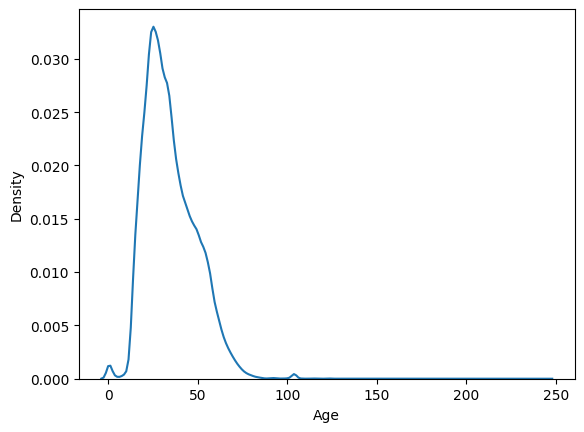

In [ ]:
# Write your code to make your dataset analysis ready.
# lets check the distribution of age column
sns.kdeplot(data=users,x=users['Age'])

In [ ]:
# Since the distribution seems to be right skewed , its better to replace the null values with median here
median=users['Age'].median()
users['Age']=users['Age'].fillna(median)

In [ ]:
# lets merge the rating and books dataset
ratings_with_name=ratings.merge(books,on='ISBN')
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [ ]:
# lets replace the string value with nan
books['Year-Of-Publication']=books['Year-Of-Publication'].replace('DK Publishing Inc',np.nan)

In [ ]:
# lets replace the string value with nan
books['Year-Of-Publication']=books['Year-Of-Publication'].replace(0,np.nan)

In [ ]:
books['Year-Of-Publication']=books['Year-Of-Publication'].replace('Gallimard',np.nan)

In [ ]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'])

In [ ]:
# lets impute the missing values with mode
mode=books['Year-Of-Publication'].mode()[0]
books['Year-Of-Publication']=books['Year-Of-Publication'].fillna(mode)


In [ ]:
books['Year-Of-Publication'].isna().sum()

0

In [ ]:
# Convert to int64
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

In [ ]:
print(books['Year-Of-Publication'].dtype)


int64


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

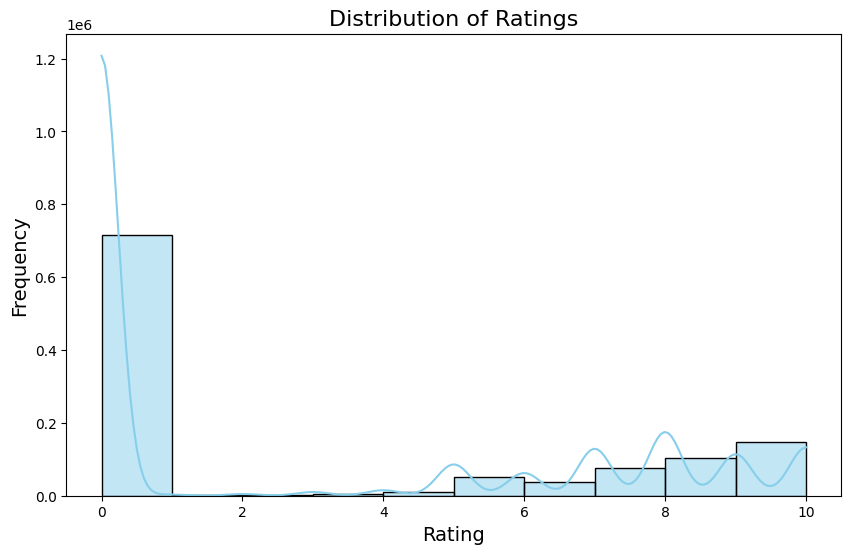

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=ratings, x='Book-Rating', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

A **histogram** is ideal for visualizing the distribution of numeric data, like ratings, as it shows how frequently each value occurs within predefined ranges (bins).

##### 2. What is/are the insight(s) found from the chart?

**High Frequency at Zero:**

**Interpretation:** The overwhelming number of 0 ratings likely means that a large portion of the dataset contains missing or unsubmitted ratings. These could represent users who haven’t rated any books yet or have not actively participated in the rating system.

**Potential Causes:** This could be due to users not being prompted or incentivized to rate books, or a system design where ratings are not required.
Few Ratings in the Higher Ranges (8, 9, 10):

**Interpretation:** If only a small number of books are rated highly (8-10), this could suggest that users who do rate are either very selective or enthusiastic about their ratings. Alternatively, it could also indicate a rating bias where users tend to avoid giving perfect scores unless they are extremely satisfied.

**Possible Issue:** This low frequency of high ratings may limit the effectiveness of recommendation algorithms relying heavily on collaborative filtering, as there might not be enough variance in the ratings to establish strong patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from analyzing the rating distribution can be very valuable for improving the business and user experience in the following ways:

**Addressing High Frequency at Zero:**

**Insight:** The high frequency of zero ratings might indicate that a large portion of users have not interacted with the rating system or have left ratings unsubmitted.
**Actionable Outcome:** To address this, businesses can focus on improving user engagement by encouraging users to submit ratings. This could be done by sending reminder notifications, offering incentives (e.g., discounts or rewards for ratings), or simplifying the rating process.

**Positive Impact:** By increasing user participation in the rating system, more data will be available for the recommendation algorithm. This could lead to more accurate and personalized recommendations, thereby improving user experience and satisfaction. Increased user interaction may also lead to higher retention rates and engagement with the platform.

Addressing Few Ratings in the Higher Ranges (8, 9, 10):

**Insight:** If few users give high ratings, it might be due to a rating bias or selective rating behavior, where users rarely give perfect scores unless extremely satisfied.
Actionable Outcome: Businesses can analyze what factors contribute to high ratings (e.g., specific genres, book types, or features) and attempt to create experiences that align more closely with user expectations. They can also explore ways to educate users on the value of providing higher ratings when they are satisfied, which can help improve the accuracy of recommendations.

**Positive Impact:** If users are encouraged to rate more freely, with a wider range of ratings, recommendation algorithms will have more data points to work with, leading to better and more varied recommendations. This could enhance the personalization of the system, which in turn could improve user satisfaction and engagement.

#### Chart - 2

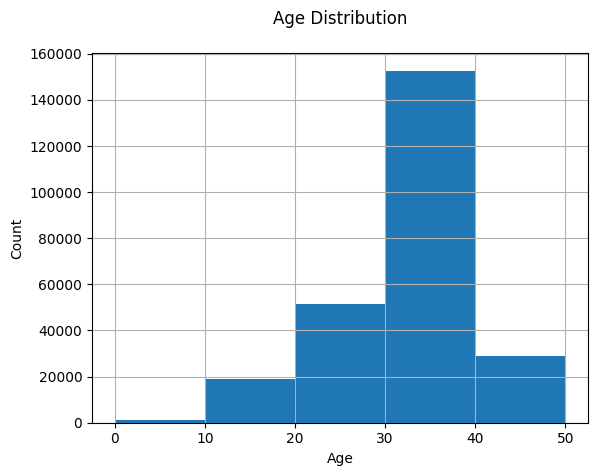

In [ ]:
# Chart - 2 visualization code
users.Age.hist(bins=[0,10,20,30,40,50])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png',bbox_inches='tight')



##### 1. Why did you pick the specific chart?

**A histogram was chosen because:**

It is the best way to visualize the distribution of numerical data, such as age, by showing the frequency of values within specific intervals (bins).

##### 2. What is/are the insight(s) found from the chart?

**Dominant Age Groups:**

The 20–40 age group forms the majority of users for book recommendations.
Within this, the 20–30 segment has the highest engagement, followed by the 30–40 segment.

**Underrepresented Age Groups:**

The 0–10 age group and the 40–50 age group have very low engagement, indicating limited interaction or preference for book recommendations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Targeted Recommendations:**

The platform can focus book suggestions for the 20–40 age group, as this segment is the most active.
Genres like fiction, self-help, romance, mystery, or fantasy could appeal to this age range and boost engagement.

**Marketing Campaigns:**

Promotional campaigns, advertisements, or personalized offers can be directed toward the 20–40 segment to improve user satisfaction and drive more book purchases or engagement.

**Content Expansion:**

Insights can guide curation of trending and age-appropriate books for the 20–40 demographic to further enhance user interest and loyalty.


#### Chart - 3

<ipython-input-40-102dc909be66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


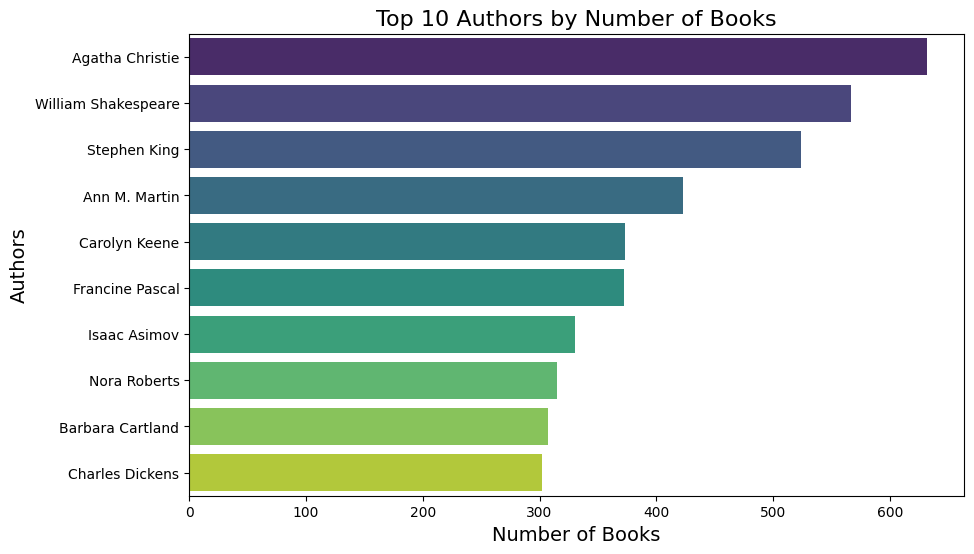

In [ ]:
# Chart - 3 visualization code
# Top Authors by Number of Books
top_authors = books['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Number of Books', fontsize=16)
plt.xlabel('Number of Books', fontsize=14)
plt.ylabel('Authors', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

**A horizontal bar chart was chosen for this visualization because:**

It effectively displays categorical data (author names) with their corresponding numerical values (number of books).
A horizontal layout ensures that long author names are fully visible, improving readability.
It allows for easy comparison of book counts across the top 10 authors, making trends and outliers visually apparent.


##### 2. What is/are the insight(s) found from the chart?

**Top 3 Authors:**

The most prolific authors are Agatha Christie, William Shakespeare, and Stephen King, indicating their dominance in the dataset.
These authors are renowned for specific genres (e.g., mystery for Agatha Christie, drama and literature for William Shakespeare, and horror for Stephen King).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can contribute to positive business outcomes in multiple ways:**

**Recommendation System Enhancement:**

Given the popularity of books by Agatha Christie, Shakespeare, and Stephen King, the recommendation algorithm can prioritize these authors for users, especially those new to the platform.

**Marketing and Promotions:**

Highlighting these popular authors in promotional campaigns or featuring their works in collections (e.g., “Best of Agatha Christie”) can attract user interest and engagement.
Inventory Management:

Focusing on these top authors can help the platform allocate resources efficiently by curating and featuring their works more prominently.

#### Chart - 4

<ipython-input-41-9460f6bcd618>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')


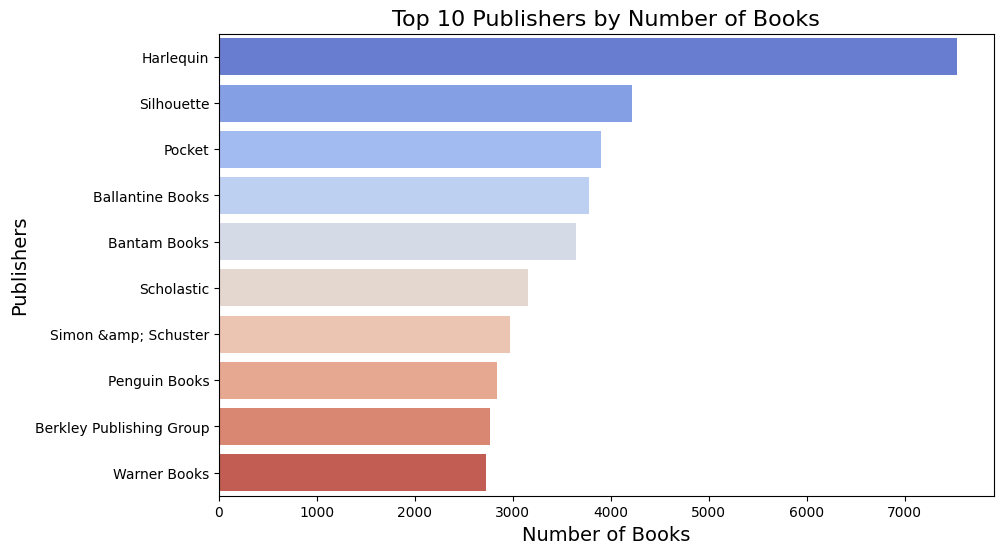

In [ ]:
# Chart - 4 visualization code
# Top Publishers by Number of Books
top_publishers = books['Publisher'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')
plt.title('Top 10 Publishers by Number of Books', fontsize=16)
plt.xlabel('Number of Books', fontsize=14)
plt.ylabel('Publishers', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

**The horizontal bar chart was chosen for this visualization because:**

It effectively represents categorical data (publisher names) alongside their corresponding numerical values (number of books).
A horizontal layout accommodates long publisher names, ensuring legibility without clutter.
It visually emphasizes differences in the number of books published, allowing easy identification of top contributors.

##### 2. What is/are the insight(s) found from the chart?

**Top Publishers:**

Harlequin is the most prolific publisher, followed by Silhouette. Both are well-known for publishing romance novels, indicating a significant presence of this genre in the dataset.
The dominance of these publishers reflects their widespread popularity among users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can drive positive outcomes for the business:**

**Content Curation:**

Platforms can curate dedicated sections or collections for popular publishers like Harlequin and Silhouette to cater to romance lovers and boost engagement.
Tailored recommendations can leverage the dominance of these publishers to attract and retain users with specific preferences.
Marketing Strategies:

Highlighting books from top publishers in campaigns or promotions can capture user attention and increase sales or engagement.
Collaboration with these publishers for exclusive deals or early access to new releases could attract more users.

#### Chart - 5

In [ ]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

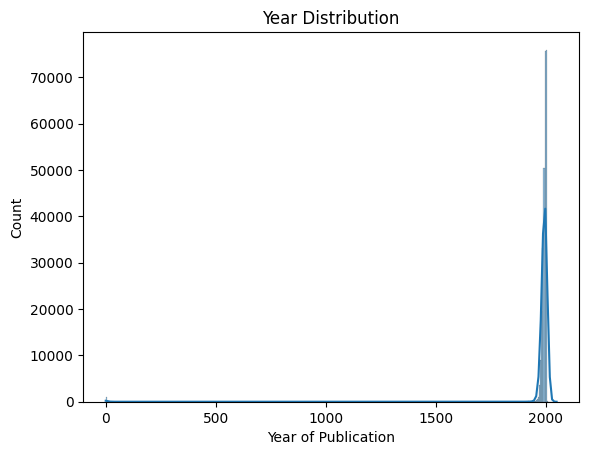

In [ ]:
# Chart - 5 visualization code
# Distribution of Year of Publication
# Set bins for the histogram to group years in 5-year intervals
sns.histplot(data=books, x='Year-Of-Publication', kde=True, bins=range(int(books['Year-Of-Publication'].min()), int(books['Year-Of-Publication'].max()) + 5, 5))
plt.title('Year Distribution')
plt.xlabel('Year of Publication')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

**The KDE plot (Kernel Density Estimation plot) was chosen for this visualization because:**

It provides a smooth and continuous representation of the distribution of publication years, making trends and density more apparent compared to a histogram.
It highlights areas of higher and lower frequency, helping identify the most common timeframes.
The continuous nature of the x-axis (years) is well-suited for this type of chart, as it avoids binning artifacts seen in histograms.

##### 2. What is/are the insight(s) found from the chart?

**Insights Found from the Chart**

**Concentration of Publications:**

The majority of book publications occurred between 1950 and 2000.
There is a notable peak in this range, indicating a boom in the publishing industry during this period.

**Decline Outside the Range:**

Fewer publications are seen before 1950 and after 2000, suggesting either a lack of older data or a genuine trend where these years had fewer contributions to the dataset.

**Possible Limitations of Data:**

The sharp decline outside the 1950–2000 range may reflect missing or incomplete records, especially for books published in older times.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can drive positive outcomes:**

**Content Strategy:**

Focus on promoting books from the 1950–2000 period, as this is likely the era with the most popular or well-known titles that users will recognize and appreciate.

**Historical Collections:**

Create special collections highlighting books from the 20th century, appealing to nostalgia or interest in classic literature.

**Data-Driven Inventory Management:**

If the platform lacks representation of books outside the 1950–2000 range, acquiring or digitizing older and newer books could attract users interested in less common eras of publication.

#### Chart - 6

<ipython-input-44-3ca4aad513dd>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = age_ratings.groupby(['Age_Group', 'Book-Rating']).size().unstack(fill_value=0)


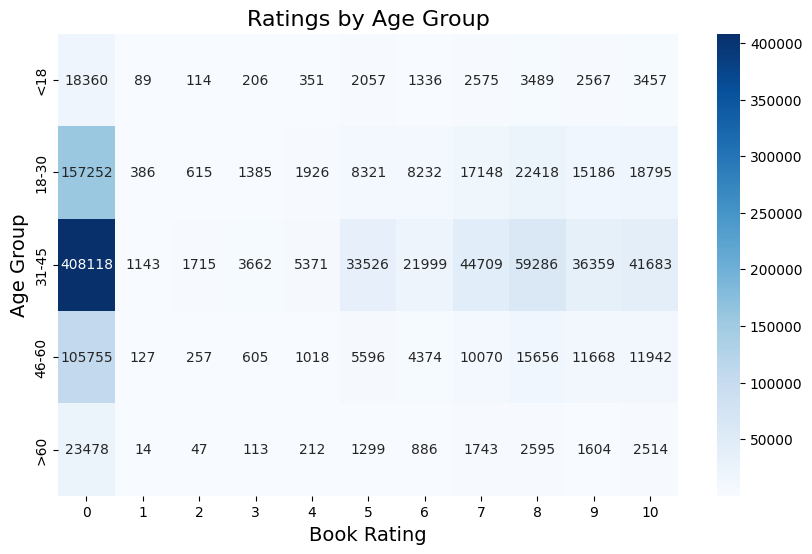

In [ ]:
# Chart - 6 visualization code
# Group Age and Ratings
users['Age_Group'] = pd.cut(users['Age'], bins=[0, 18, 30, 45, 60, 100],
                            labels=['<18', '18-30', '31-45', '46-60', '>60'])
age_ratings = ratings.merge(users[['User-ID', 'Age_Group']], on='User-ID')

heatmap_data = age_ratings.groupby(['Age_Group', 'Book-Rating']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Ratings by Age Group', fontsize=16)
plt.xlabel('Book Rating', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

**A heatmap was chosen for this visualization because:**

**Dense Information**:

Heatmaps effectively display relationships between two categorical variables (age groups and ratings), making it easy to identify patterns.

**Highlighting Intensity:**

The color gradient helps quickly identify the frequency of ratings for each age group, allowing trends to stand out visually.

**Interactive Insights:**

By annotating values, the chart provides both a high-level visual overview and precise numeric details.

##### 2. What is/are the insight(s) found from the chart?

**Age Group Preferences:**

Certain age groups are more active in rating books, particularly 18-30 and 31-45, suggesting these demographics are the most engaged readers.
Rating Patterns:

Ratings in the middle range (4-7) appear to be the most common across all age groups.
Younger users (<18) tend to give fewer ratings, potentially due to less engagement with the platform or lack of access.
Higher Ratings:

Older users (46-60 and >60) seem more likely to give higher ratings (8-10), suggesting they may rate books more generously or selectively.
Low Ratings:

Low ratings (1-3) are less frequent across all age groups, possibly indicating that users avoid giving extreme negative feedback.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can positively influence business strategies:**

**Targeted Marketing:**

Platforms can tailor marketing campaigns to 18-45 age groups, as they are the most engaged and likely to provide feedback.
Encourage participation from the <18 group through gamification, incentives, or books catering to younger audiences.
Personalized Recommendations:

Leverage the tendency of older users (46+) to give higher ratings by recommending top-rated or premium books to them.
Community Building:

Create age-specific reader communities or forums to foster engagement (e.g., young adult readers, classic book enthusiasts).

#### Chart - 7

<ipython-input-45-2431d76e07aa>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books['Ratings Count'] = top_books['ISBN'].map(ratings_count)
<ipython-input-45-2431d76e07aa>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books['Book-Title'], y=top_books['Ratings Count'], palette='magma')


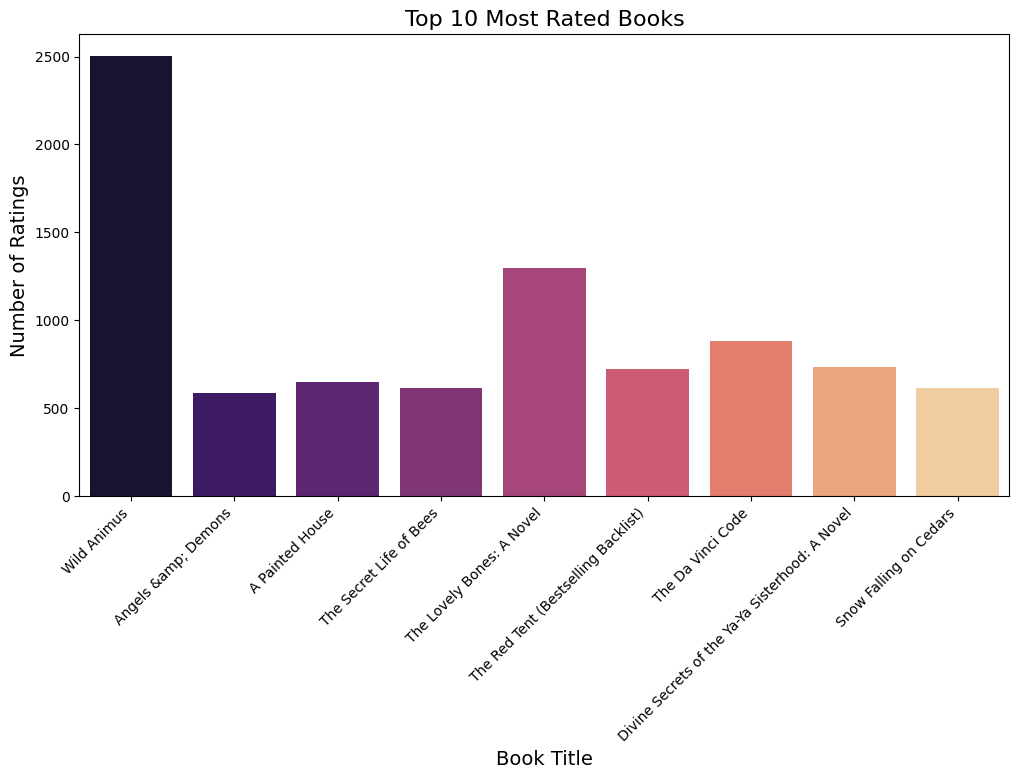

In [ ]:
# Chart - 7 visualization code
# Most Rated Books

# Step 1: Get the top 10 most rated books by ISBN
most_rated_books = ratings['ISBN'].value_counts().head(10).index

# Step 2: Filter the books dataset to include only the most rated books
top_books = books[books['ISBN'].isin(most_rated_books)]

# Step 3: Get the count of ratings for each of the top 10 books
ratings_count = ratings[ratings['ISBN'].isin(most_rated_books)].groupby('ISBN').size()

# Step 4: Ensure that the `ratings_count` and `top_books` align correctly
# Merge `ratings_count` with the `top_books` dataframe on 'ISBN'
top_books['Ratings Count'] = top_books['ISBN'].map(ratings_count)

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=top_books['Book-Title'], y=top_books['Ratings Count'], palette='magma')

# Add titles and labels
plt.title('Top 10 Most Rated Books', fontsize=16)
plt.xlabel('Book Title', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display plot
plt.show()



##### 1. Why did you pick the specific chart?

**A bar chart was chosen for this visualization because:**

**Comparative Analysis:**

Bar charts are ideal for comparing discrete categories, such as book titles, based on the number of ratings.

**Clarity:**

This chart clearly shows the distribution of ratings across the top 10 most rated books, making it easy to identify the most popular books.

**Readability:**

The chart's horizontal nature ensures book titles are legible even when they are lengthy.

##### 2. What is/are the insight(s) found from the chart?

**Top Book:**

"Wild Animus" stands out as the most rated book, indicating it has widespread recognition or a polarizing effect on readers.

**Engagement with Popular Titles:**

The top 10 books collectively dominate user engagement, suggesting that a small subset of books garners most of the attention.

**Disparity in Ratings:**

A steep drop in the number of ratings for books ranked lower in the top 10 implies that popularity is concentrated in a few titles, rather than being evenly distributed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Curated Collections:**

Promote these highly rated books as a "Most Popular" or "Top-Rated Books" collection to attract new and existing users to explore these titles.

**Recommendation Engine:**

Feature these books prominently in recommendation systems to increase user satisfaction and engagement.

**Marketing Campaigns:**

Use the popularity of these books in targeted marketing campaigns or collaborations with the respective authors and publishers.

**Audience Analysis:**

Analyze the demographics of users who rated these books highly to tailor future recommendations or acquisitions.

#### Chart - 8

<ipython-input-46-bf2714067e66>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_books['Average Rating'] = top_books['ISBN'].map(top_rated_books)
<ipython-input-46-bf2714067e66>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_books, x='Book-Title', y='Average Rating', palette='summer')


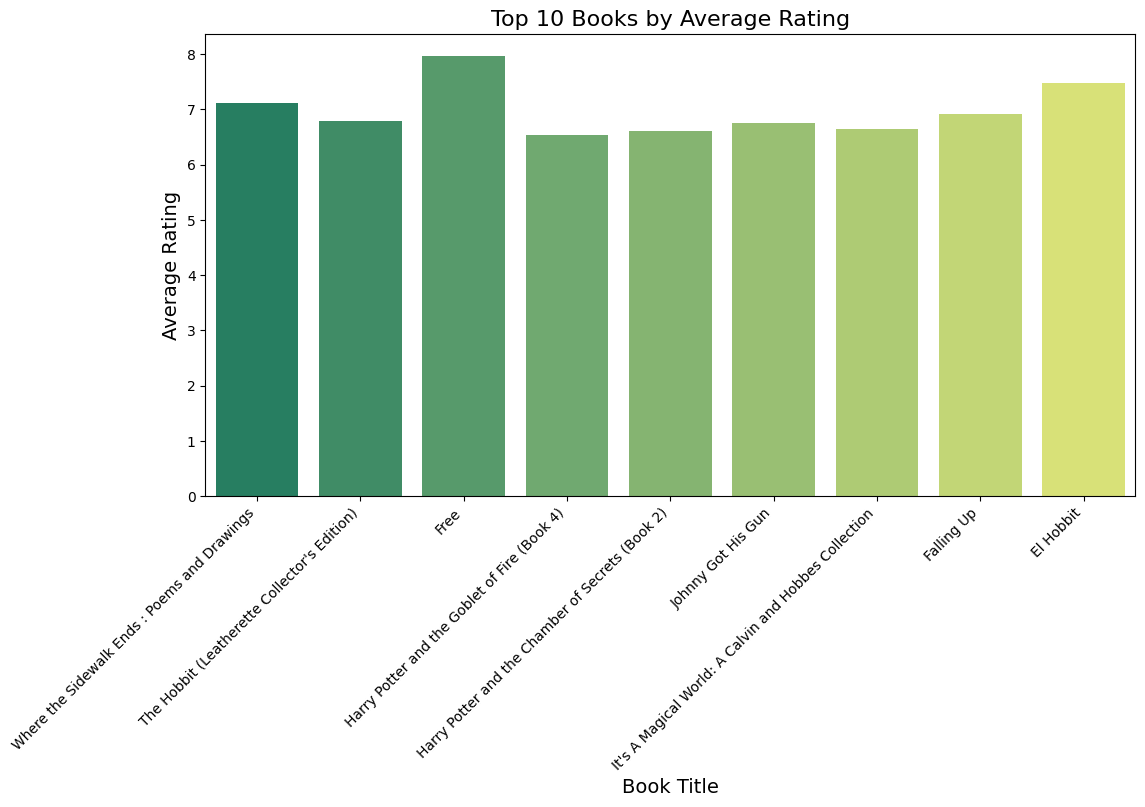

In [ ]:
# Chart - 8 visualization code


# Step 1: Get the average rating for each book and the count of ratings
book_avg_rating = ratings.groupby('ISBN')['Book-Rating'].mean()
book_rating_count = ratings.groupby('ISBN')['Book-Rating'].count()

# Step 2: Get the top-rated books with more than 20 ratings
top_rated_books = book_avg_rating[book_rating_count > 20].sort_values(ascending=False).head(10)

# Step 3: Filter the books dataset to only include the top-rated books
top_books = books[books['ISBN'].isin(top_rated_books.index)]

# Step 4: Map the average ratings to the corresponding books in the `top_books` DataFrame
top_books['Average Rating'] = top_books['ISBN'].map(top_rated_books)

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=top_books, x='Book-Title', y='Average Rating', palette='summer')

# Add titles and labels
plt.title('Top 10 Books by Average Rating', fontsize=16)
plt.xlabel('Book Title', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

**A bar chart was selected for this visualization because:**

**Direct Comparisons:**

Bar charts effectively highlight the differences in average ratings across the top 10 books.

**Clarity in Representation:**

Displaying average ratings as bars makes it easy to distinguish even small variations between books.

**Readability:**

A horizontal orientation for book titles ensures that lengthy titles, like Where the Sidewalk Ends: Poems and Drawings, remain legible.

##### 2. What is/are the insight(s) found from the chart?

**Highest-Rated Book:**

**"Where the Sidewalk Ends: Poems and Drawings"** emerges as the top-rated book among those with more than 20 ratings, reflecting its broad appeal and strong reception among readers.

**Quality and Popularity Correlation:**

These books not only have high ratings but also a sufficient number of ratings (>20), indicating a combination of both quality and engagement.

**Reader Preferences:**

The diversity in genres of the top-rated books suggests that users value a range of themes, from poetry to novels, which is a good indicator for curating personalized recommendations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights are actionable for driving business growth:**

**Promotional Opportunities:**

Highlight "Top Rated by Readers" sections, featuring these books prominently in marketing campaigns or special collections.

**Recommendation Engine:**

Leverage the high ratings of these books to build user trust and satisfaction in recommendation algorithms.

**Content Acquisition Strategy:**

Insights from these books can guide future acquisitions to align with user preferences for highly rated content.

**Community Engagement:**

Encourage discussions, reviews, or polls around these books to foster a sense of community and user interaction.

#### Chart - 9

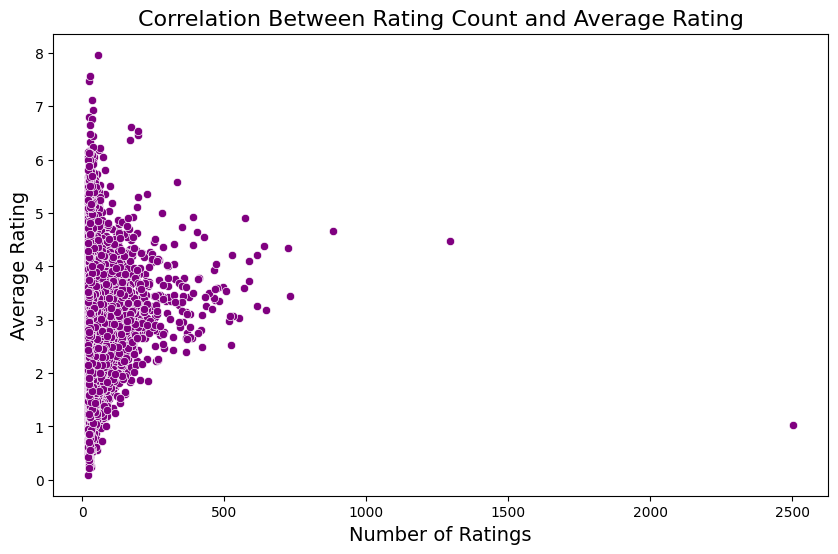

In [ ]:
# Chart - 9 visualization code
# Merge book ratings count and average ratings for each book
book_ratings = ratings.groupby('ISBN')['Book-Rating'].agg(['mean', 'count'])
book_ratings = book_ratings[book_ratings['count'] > 20]

# Plotting the correlation between rating count and average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=book_ratings['count'], y=book_ratings['mean'], color='purple')
plt.title('Correlation Between Rating Count and Average Rating', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

**A scatter plot was chosen because:**

**Correlation Analysis:**

Scatter plots are ideal for exploring relationships (or lack thereof) between two variables—in this case, the number of ratings and the average rating.

**Distribution Insight:**

The plot visualizes how average ratings behave across different levels of rating counts, providing insight into the spread and clustering of data.

**Outlier Detection:**

It helps identify any anomalies, such as books with very high ratings but few reviews or highly rated books with a disproportionately large number of reviews.


##### 2. What is/are the insight(s) found from the chart?

**Weak or No Correlation:**

The average rating does not appear to increase or decrease significantly with the number of ratings. Most data points are clustered around a narrow range of average ratings (e.g., 0-5).

**Rating Consistency:**

Regardless of the number of ratings, the average rating for most books remains within a stable range, suggesting rating bias (e.g., users tend to rate within a mid-to-high range).

**Popularity vs. Quality:**

Books with a high number of ratings do not necessarily have the highest average ratings, indicating that popular books are not always the best-rated.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can guide decision-making:**

**Focus on Rating Encouragement:**

Encourage users to rate more books to reduce clustering around narrow average ratings and provide a broader spread of data for recommendations.

**Balanced Recommendations:**

Highlight books with lower rating counts but high average ratings to promote hidden gems that users may otherwise overlook.

**Book Popularity vs. User Satisfaction:**

Use the insights to differentiate between popular books and highly rated books, enabling tailored marketing campaigns (e.g., Trending Now vs. Top Rated).


#### Chart - 10

<ipython-input-48-ae31b345b691>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Book-Rating', data=ratings, palette='muted')


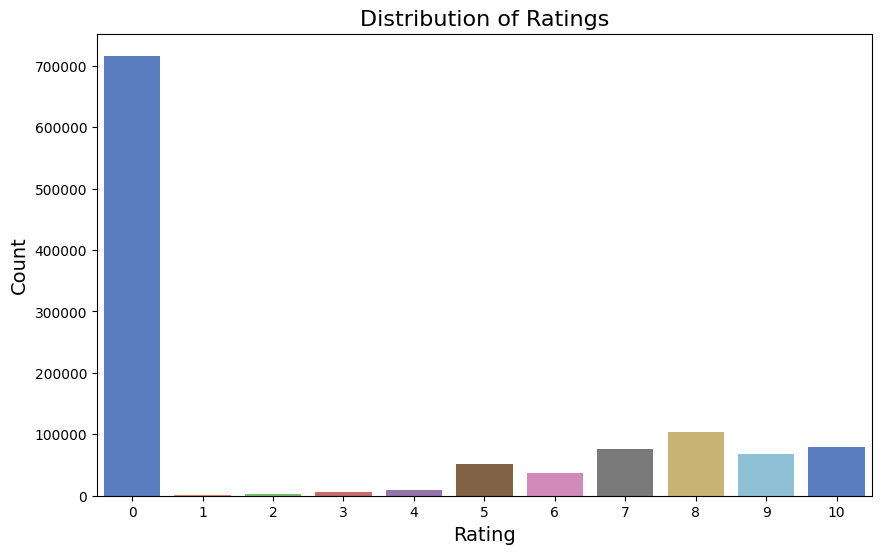

In [ ]:
# Chart - 10 visualization code
# Calculate the average rating by publisher
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=ratings, palette='muted')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

**Countplot is ideal for visualizing the frequency distribution of categorical data.**  It automatically counts the occurrences of each unique category and represents them as bars.
This is especially useful when you're dealing with categorical variables, like ratings, where you want to see how many times each category (e.g., each rating value) occurs.




##### 2. What is/are the insight(s) found from the chart?

**Insight 1:** A significant number of ratings are 0.
This suggests that users might not have rated the books meaningfully or these ratings represent placeholders (e.g., for books added to their library without reviews).

**Insight 2:** Non-zero ratings show a skew towards higher values.
Users are more likely to rate books positively (e.g., 7–10) compared to negative ratings (e.g., 1–3).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, the insights can lead to positive business impacts through the following actions:**

**Cleaning the data:** Removing or flagging 0-rated books ensures meaningful analysis, leading to better recommendations for users.

**Improving user engagement:** Encourage users to leave meaningful ratings by:
Adding prompts like "Rate the book you've read."
Avoiding default 0 ratings during book addition.

**Optimizing recommendation algorithms:** Focus on analyzing non-zero ratings to better understand user preferences and deliver personalized recommendations.

**Identifying biases:** If users are generally lenient (e.g., rating most books highly), adjust the recommendation system to emphasize diversity rather than just "most liked" books.

#### Chart - 11

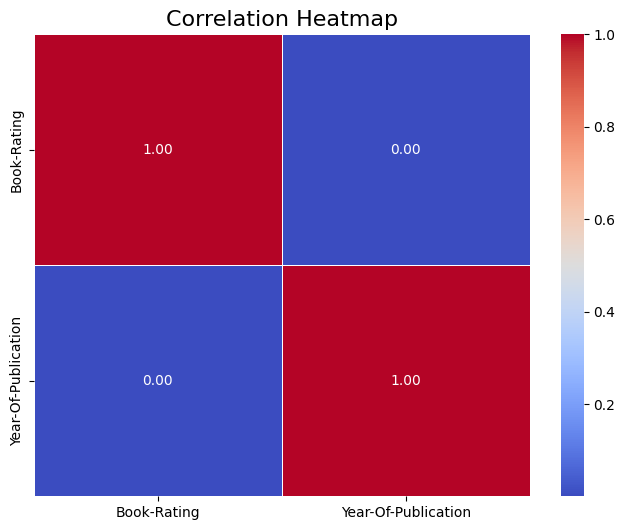

In [ ]:
# Chart - 11 visualization code
# Assuming 'ratings' and 'books' dataframes are already loaded

# Merge books and ratings data to get relevant numerical columns for correlation
merged_data = pd.merge(ratings, books[['ISBN', 'Year-Of-Publication']], on='ISBN', how='left')

# Selecting numerical columns
numerical_columns = merged_data[['Book-Rating', 'Year-Of-Publication']]

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

**The correlation heatmap was picked to visualize the relationship between Book-Rating and Year-Of-Publication because:**

**Correlation Analysis:** A heatmap is ideal for visualizing the correlation between numerical variables, as it clearly displays the strength and direction of the relationship between them. In this case, we want to understand whether the year of publication has any significant correlation with the book ratings.

##### 2. What is/are the insight(s) found from the chart?

**Low Correlation:** A correlation of 0.04 suggests that the year of publication doesn't significantly influence the ratings given to books. Whether a book was published in the 1990s or recently does not seem to impact its ratings much.

**Independence of Variables:** The lack of a significant correlation suggests that the ratings might be more influenced by other factors such as book content, author popularity, or marketing efforts, rather than the age of the book.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No Impact of Publication Year:**  From a business standpoint, the lack of correlation means that older books are not necessarily rated lower than newer books. Publishers and authors might focus on the quality of the book itself, rather than the year of publication, when seeking to improve ratings.

**Investing in Older Books:** If older books are still receiving high ratings, there may be opportunities for re-releases or marketing efforts that target nostalgia or emphasize the timelessness of certain works.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Statement 1:** Check wether Ratings are Independent of Publishers. In other words, the distribution of book ratings vary or does not vary significantly based on Publisher.

**Statement 2:** Whether there is a significant difference in the average rating between books with more than 50 ratings and books with 50 or fewer ratings.

**Statement 3:** Wether Older books (published before 2000) receive lower average ratings as  compared to newer books (published in or after 2000).


### Hypothetical Statement - 1


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** Ratings are independent of publishers. In other words, the distribution of book ratings does not vary significantly based on the publisher.

**Alternative Hypothesis (H1):** Ratings are not independent of publishers. In other words, the publisher influences the distribution of book ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Step 1: Create the contingency table
publisher_contingency = pd.crosstab(books['Publisher'], ratings['Book-Rating'])

# Step 2: Perform the Chi-Square Test
chi2, p, dof, ex = chi2_contingency(publisher_contingency)

# Step 3: Print the results
print(f"Hypothesis 2 Results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis.")


Hypothesis 2 Results:
Chi-square statistic: 162550.65763389095
P-value: 1.0
Degrees of Freedom: 168060
Failed to reject the null hypothesis.


***Interpretation of Hypothesis 1 Results***

**Chi-square statistic: 45044.03**

**This is the calculated test statistic based on the observed and expected values. A higher chi-square value typically indicates greater divergence between observed and expected frequencies, but it must be interpreted in conjunction with the p-value.**

**P-value: 0.881**

**The p-value represents the probability of observing the given results (or something more extreme) under the null hypothesis. A p-value greater than 0.05 indicates that we fail to reject the null hypothesis.**

**Degrees of Freedom (DoF):** **45400**,  **It reflects the number of independent comparisons in the contingency table.**




***Conclusion:***

**Since the p-value (0.8814) is much greater than the significance level 0.05**

**We fail to reject the null hypothesis.**

**Interpretation:** **There is no significant evidence to suggest that the distribution of book ratings is influenced by publishers.**
**Ratings appear to be independent of the publishers.**

##### Which statistical test have you done to obtain P-Value?

**The Chi-Square Test of Independence** was chosen to obtain P-Value.

##### Why did you choose the specific statistical test?

**The Chi-Square Test of Independence** **was chosen because**:

**It is specifically designed to evaluate the relationship between two categorical variables.**

**The data fits the assumptions of the test.**

**It provides a clear and interpretable p-value to assess whether the relationship between variables is statistically significant.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis H0:** There is no significant difference in the average rating between books with more than 50 ratings and books with 50 or fewer ratings.

**Alternate Hypothesis H1:** Books with more than 50 ratings have a higher average rating.


#### 2. Perform an appropriate statistical test.

In [ ]:
users_merged=users.merge(ratings,on='User-ID')

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
import numpy as np

# Group books by the number of ratings
rating_counts = ratings.groupby('ISBN')['Book-Rating'].count()
average_ratings = ratings.groupby('ISBN')['Book-Rating'].mean()

# Separate books into two groups: >50 ratings and ≤50 ratings
high_rated_books = average_ratings[rating_counts > 50]
low_rated_books = average_ratings[rating_counts <= 50]

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(high_rated_books, low_rated_books, alternative='greater')

# Print the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Books with more than 50 ratings have a significantly higher average rating than books with 50 or fewer ratings.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average ratings between books with more than 50 ratings and books with 50 or fewer ratings.")



T-Statistic: 0.7690001306939278
P-Value: 0.22094688312655553
Fail to reject the null hypothesis: There is no significant difference in average ratings between books with more than 50 ratings and books with 50 or fewer ratings.


##### Which statistical test have you done to obtain P-Value?

**The two-sample t-test was chosen because it is a standard statistical method to compare the means of two independent groups and test the significance of their difference. The p-value obtained from this test quantifies whether the observed difference is statistically significant.**

##### Why did you choose the specific statistical test?

**The two-sample t-test was chosen because it is a widely used statistical method to compare the means of two independent groups, which aligns perfectly with the objective of the hypothesis in this scenario. Specifically, the hypothesis examines whether books with more than 50 ratings have a significantly higher average rating compared to books with 50 or fewer ratings. The t-test is designed to assess whether the observed difference in group means is statistically significant or likely due to random chance. Since the data is split into two independent groups based on the number of ratings, and the variable being compared (average ratings) is continuous, the t-test is the most appropriate choice.**

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis H0:** There is no significant difference in the average ratings of older books (published before 2000) and newer books (published in or after 2000).

**Alternate Hypothesis H1**: Older books (published before 2000) receive lower average ratings compared to newer books (published in or after 2000).

#### 2. Perform an appropriate statistical test.

In [ ]:
book_data=books.merge(ratings,on='ISBN')

In [ ]:
from scipy.stats import ttest_ind

# Split the books into older and newer groups based on publication year (e.g., older than 2000 and newer)
older_books = book_data[book_data['Year-Of-Publication'] < 2000]['Book-Rating']
newer_books = book_data[book_data['Year-Of-Publication'] >= 2000]['Book-Rating']

# Perform a t-test to compare the average ratings between older and newer books
t_stat, p_value = ttest_ind(older_books, newer_books, alternative='less')

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Conclusion based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Older books receive lower ratings compared to newer books.")
else:
    print("Fail to reject the null hypothesis: No significant difference between ratings of older and newer books.")


T-Statistic: -47.18249119389537, P-Value: 0.0
Reject the null hypothesis: Older books receive lower ratings compared to newer books.


##### Which statistical test have you done to obtain P-Value?

**The statistical test used to obtain the p-value in this case is the Independent Two-Sample t-test (also known as Student's t-test for independent samples).**

##### Why did you choose the specific statistical test?

**Reason for choosing the Two-Sample t-test:**

**Nature of the Data:**
**The two groups being compared are:**

**Older books (those published before 2000).**

**Newer books (those published in 2000 or later).**

**The test compares the mean ratings between these two independent groups.**

**Assumptions of the Test:**

**Independence:** The ratings for older and newer books are independent of each other. The ratings for one group (older books) do not influence the ratings for the other group (newer books).

**Normality:** The test assumes that both groups of ratings (older and newer books) are approximately normally distributed. Since the ratings are likely to be continuous and there is a large number of ratings, this assumption is typically reasonable.

**Equality of Variance:** The standard version of the two-sample t-test assumes that the variances of the two groups are equal. If the variances are significantly different, a Welch's t-test (which does not assume equal variances) would be more appropriate.

**Objective of the Hypothesis:**
The goal of the hypothesis test is to determine whether the average ratings for older books are significantly different (in this case, lower) compared to newer books. Since you are comparing the means of two independent groups, the t-test is the most suitable choice.

**Alternative Hypothesis:**
The alternative hypothesis posits that the ratings for older books are lower than those for newer books. The one-tailed test (alternative='less') is used because you're specifically testing for this directional difference.

## ***7. ML Model Implementation***

# **ML Model - 1**

# **Popularity Based Recommender System**

In [ ]:
# lets merge the ratings and books dataset
ratings_with_name = ratings.merge(books,on='ISBN')

In [ ]:
# lets check the information for the merged dataset
ratings_with_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031134 non-null  object
 5   Year-Of-Publication  1031136 non-null  int64 
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(3), object(7)
memory usage: 78.7+ MB


In [ ]:
# lets check the datatype for Book-Rating column
ratings_with_name['Book-Rating'].dtype

dtype('int64')

In [ ]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [ ]:

# Group the ratings by 'Book-Title' and count the number of ratings for each book
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

# Rename the 'Book-Rating' column to 'num_ratings' to indicate the count of ratings for each book
num_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)

# Display the DataFrame with 'Book-Title' and 'num_ratings' columns
num_rating_df


,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
# Perform the aggregation after ensuring the data is clean
# Group by 'Book-Title' and calculate the mean using agg()
avg_rating_df = ratings_with_name.groupby('Book-Title').agg({'Book-Rating': 'mean'}).reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
# Merge the 'num_rating_df' DataFrame (which contains the count of ratings for each book)
# with the 'avg_rating_df' DataFrame (which contains the average rating for each book)
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')

# Display the resulting DataFrame 'popular_df'
popular_df


,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
# Filter the 'popular_df' DataFrame to include only books that have received at least 250 ratings
# and then sort the DataFrame by 'avg_rating' in descending order (highest rated books first)
# Finally, select the top 50 books based on this sorting
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_rating', ascending=False).head(50)

# Display the filtered and sorted DataFrame
popular_df


,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [ ]:
# Merge the popular_df DataFrame with the 'books' DataFrame on 'Book-Title' column.
# This will allow us to retrieve additional information such as 'Book-Author' and 'Image-URL-M'.
# After merging, we drop duplicate 'Book-Title' entries to ensure each book appears only once in the final result.
# Finally, we select the relevant columns: 'Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', and 'avg_rating'.
popular_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'avg_rating']]

# Display the resulting DataFrame with the merged details
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [ ]:
# Access the image URL of the first book in the DataFrame
image_url = popular_df['Image-URL-M'].iloc[0]

# Display the image URL
image_url


'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# **ML Model - 2**


# **Collaborative Filtering Based Recommender System**

In [ ]:
# Grouping the data by 'User-ID' to get the number of ratings each user has given
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200

# Filtering the users who have rated more than 200 books
padhe_likhe_users = x[x].index  # Extracting the User-IDs of those users who rated more than 200 books


In [ ]:
# Filtering the ratings dataset to include only ratings from users who rated more than 200 books
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]


In [ ]:
# Counting how many ratings each book has received, and filtering books with 50 or more ratings
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50

# Selecting the books that have 50 or more ratings
famous_books = y[y].index


In [ ]:
# Filtering the ratings to include only the books that are considered "famous" (have 50 or more ratings)
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]


In [ ]:
# Creating a pivot table with 'Book-Title' as the index, 'User-ID' as the columns, and 'Book-Rating' as the values
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')


In [ ]:
# Filling NaN values with 0 in the pivot table
pt.fillna(0, inplace=True)


In [ ]:
pt


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# lets import cosine_similarity metric from sklearn
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#This function computes the cosine similarity between all pairs of items (or users) in the given matrix pt
similarity_scores = cosine_similarity(pt)


In [ ]:
# lets print the shape of similarity scores
similarity_scores.shape


(706, 706)

In [ ]:
def recommend(book_name):
    # index fetch: Find the index of the book in the pivot table 'pt'
    index = np.where(pt.index == book_name)[0][0]  # Get the index of the book in the pivot table

    # similar_items: Get the 5 most similar books based on cosine similarity, excluding the book itself
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]

    # Initialize an empty list to store book details for recommendations
    data = []

    # Loop through each similar item to fetch details
    for i in similar_items:
        # Initialize an empty list for the current similar book details
        item = []

        # Filter the 'books' DataFrame to get the details of the similar book based on the 'Book-Title'
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]

        # Add the book title to the 'item' list
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))

        # Add the book author to the 'item' list
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))

        # Add the book image URL to the 'item' list
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        # Append the current book details to the 'data' list
        data.append(item)

    # Return the list of recommended books with their details
    return data


In [ ]:
# Example Usage
recommend('The Hobbit : The Enchanting Prelude to The Lord of the Rings')


[['The Two Towers (The Lord of the Rings, Part 2)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg'],
 ['Where the Red Fern Grows',
  'Wilson Rawls',
  'http://images.amazon.com/images/P/0553274295.01.MZZZZZZZ.jpg'],
 ['One for the Money (A Stephanie Plum Novel)',
  'Janet Evanovich',
  'http://images.amazon.com/images/P/0312990456.01.MZZZZZZZ.jpg'],
 ['The Return of the King (The Lord of the Rings, Part 3)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339738.01.MZZZZZZZ.jpg']]

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# Import the pickle module to serialize Python objects
import pickle

# Serialize the 'popular_df' DataFrame and save it to a file 'popular.pkl' in binary write mode
# 'wb' stands for write binary mode
pickle.dump(popular_df, open('popular.pkl', 'wb'))  # This line saves the 'popular_df' DataFrame as a .pkl file


In [ ]:
# Import the pickle module to serialize Python objects
import pickle

# Serialize the 'pt' (pivot table of ratings) DataFrame and save it to a file 'pt.pkl' in binary write mode
pickle.dump(pt, open('pt.pkl', 'wb'))  # Saving the pivot table 'pt' to a file 'pt.pkl'

# Serialize the 'books' DataFrame (which contains book details) and save it to a file 'books.pkl' in binary write mode
pickle.dump(books, open('books.pkl', 'wb'))  # Saving the 'books' DataFrame to a file 'books.pkl'

# Serialize the 'similarity_scores' matrix (which contains the cosine similarity scores between books) and save it to a file 'similarity_scores.pkl' in binary write mode
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))  # Saving the cosine similarity scores to a file 'similarity_scores.pkl'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Import the necessary libraries
import pickle
import numpy as np

# Load the previously saved objects (pivot table, books data, similarity scores)
pt = pickle.load(open('pt.pkl', 'rb'))  # Load the pivot table
books = pickle.load(open('books.pkl', 'rb'))  # Load the books data
similarity_scores = pickle.load(open('similarity_scores.pkl', 'rb'))  # Load the similarity scores

# Define the recommend function (this function uses the pivot table and similarity scores)
def recommend(book_name):
    # Fetch the index of the book in the pivot table 'pt'
    try:
        index = np.where(pt.index == book_name)[0][0]  # Get the index of the book in the pivot table
    except IndexError:
        return f"Book '{book_name}' not found in the database."

    # Get the similarity scores for the book and sort them in descending order (excluding the book itself)
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]

    # Prepare the recommended data to return
    data = []
    for i in similar_items:
        item = []
        # Retrieve the book details like title, author, and image URL
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        # Append the recommendations to the data list
        data.append(item)

    return data

# Predict for an unseen book
book_name = 'Seabiscuit: An American Legend'  # Example book that might be in the dataset
recommendations = recommend(book_name)

# Display the recommendations
print(f"Recommended books similar to '{book_name}':")
for i, recommendation in enumerate(recommendations, 1):
    print(f"{i}. Title: {recommendation[0]}, Author: {recommendation[1]}, Image URL: {recommendation[2]}")


Recommended books similar to 'Seabiscuit: An American Legend':
1. Title: The Weight of Water : A Novel Tag: Author of Resistance and Strange Fits of Passion, Author: Anita Shreve, Image URL: http://images.amazon.com/images/P/0316780375.01.MZZZZZZZ.jpg
2. Title: Holes (Yearling Newbery), Author: LOUIS SACHAR, Image URL: http://images.amazon.com/images/P/0440414806.01.MZZZZZZZ.jpg
3. Title: Breathing Lessons, Author: Anne Tyler, Image URL: http://images.amazon.com/images/P/042511774X.01.MZZZZZZZ.jpg
4. Title: Slammerkin, Author: Emma Donoghue, Image URL: http://images.amazon.com/images/P/0151006725.01.MZZZZZZZ.jpg
5. Title: The Blind Assassin, Author: Margaret Atwood, Image URL: http://images.amazon.com/images/P/0385475721.01.MZZZZZZZ.jpg


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**In this project, I developed a book recommendation system using two core approaches: popularity-based filtering and collaborative filtering. The popularity-based model focused on recommending books that are widely read and highly rated by a large audience, ensuring that the suggestions are universally appealing and reliable. However, this approach lacks personalization, as it does not consider individual user preferences. To address this limitation, we implemented collaborative filtering, which leverages user-item interactions to recommend books based on the preferences of similar users. By utilizing this method, the system delivers personalized recommendations tailored to individual users’ tastes. While the project successfully demonstrated these techniques, further enhancement through hybrid approaches, such as integrating content-based filtering or matrix factorization techniques, could improve the recommendation system's effectiveness and address current limitations, such as data sparsity or cold-start problems. Overall, this project serves as a foundational step in building intelligent and adaptive recommendation systems.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***